<a href="https://colab.research.google.com/github/darishkhan/Numerical-Linear-Algebra-Lab/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt  #to plot graph
from tabulate import tabulate    #to print table in an efficient manner

In [ ]:
#function for Jacobi Iterative Solver
def JacobiIterSelf_m(A, b, tol=1e-8, maxiter=150):
    x = np.random.random_sample(len(b))
    err = np.zeros(maxiter)             #initialising error list
    ax = np.zeros(maxiter)              #initialising x axis to plot graph
    table = np.zeros((maxiter, len(b)+1))      #table initialisation

    for k in range(maxiter):
      x_old  = x.copy()
      for i in range(len(b)):
        summation = 0
        for j in range(len(b)):
          if(i!=j):
            summation += A[i][j]*x[j]
        x[i] = (b[i] - summation) / np.diagonal(A)[i]
      err[k] = np.linalg.norm(np.dot(A, x) - b, ord = np.inf)
      ax[k] = k+1
      table[k+1:] = np.concatenate(([k+1], x), axis = None)

      #necessary condition to break the loop if tolerance has been achieved
      if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x_old, ord=np.inf) < tol:
        break

    #graph plot
    plt.plot(ax, err)
    plt.xlabel("Iterations")
    plt.ylabel("Residual error")
    plt.title("No. of Iterations vs Residual error")

    #preparing table
    head = ["Iter", "xl_1", "xk_2", "xk_3", "xk_4", "xk_5"]
    table = tabulate(table, headers=head)
    print("\nTable :\n", table)

    return x

In [ ]:
#function for Gauss Seidel Iterative Solver
def GSIterSelf_m(A, b, tol=1e-8, maxiter=150):
    x = np.random.random_sample(len(b))

    for k in range(maxiter):
        x_old  = x.copy()
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]

        #necessary condition to break the loop if tolerance has been achieved
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break

    return x

A = 
 [[ 6.  1.  1.  1.  1.]
 [ 1.  7.  1.  1.  1.]
 [ 1.  1.  8.  1.  1.]
 [ 1.  1.  1.  9.  1.]
 [ 1.  1.  1.  1. 10.]]
b = 
 [-10  -6   0   8  18]

Table :
   Iter      xl_1       xk_2          xk_3      xk_4     xk_5
------  --------  ---------  ------------  --------  -------
     0   0         0          0            0         0
     1  -2.04689  -0.866792   0.191606     1.12462   1.95975
     2  -2.0682   -1.02968    0.00168934   1.01516   2.0081
     3  -1.99921  -1.00368   -0.00254677   0.999704  2.00057
     4  -1.99901  -0.999817  -0.000181342  0.999826  1.99992
     5  -1.99996  -0.999944   1.9627e-05   0.999996  1.99999
     6  -2.00001  -0.999999   3.09206e-06  1         2
     7  -2        -1         -8.61717e-08  1         2
     8  -2        -1         -4.21817e-08  1         2
     9  -2        -1         -1.10603e-09  1         2
    10  -2        -1          4.56897e-10  1         2
    10  -2        -1          4.56897e-10  1         2
    10  -2        -1         

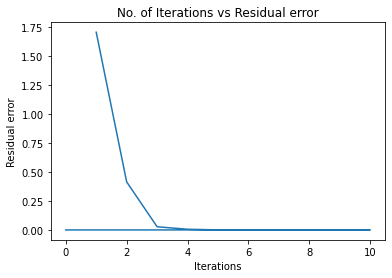

In [ ]:
A = np.ones((5, 5))
A = A - np.diag(np.diagonal(np.identity(5)))
A = A + np.diag([6, 7, 8, 9, 10])

b = np.array([-10, -6, 0, 8, 18])

print("A = \n", A)
print("b = \n", b)

x = JacobiIterSelf_m(A, b)
print("\nSolution from Jacobi Iteration: ")
print(x)

x = GSIterSelf_m(A, b)
print("\nSolution from Gauss Seidel Iteration: ")
print(x)

x = np.linalg.solve(A, b)
print("\nExact solution: ")
print(x)